In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
# Check how the dataset looks like
df = pd.read_csv("Cluster_Hackathon_dump.csv")
df.head()

,App_ID,amount,balance,bank_statement_id,Transaction_Date,Transaction_Details,lender,Bank,File_ID,Has_Password,IFSC,Bank Statements__statement_from,Bank Statements__statement_to
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-10T05:30:00+05:30,APY5759796_102018_501203751878_INSTALLME,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-29T05:30:00+05:30,UPI-50100188029243-SRINATHAR56@OKHDFCBANK-PAY-...,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,CREDIT INTEREST CAPITALISED,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,NaN,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30


In [3]:
#Checking the null values
df.isnull().sum()

App_ID                                  0
amount                                  0
balance                                 0
bank_statement_id                       0
Transaction_Date                        0
Transaction_Details                     0
lender                             196178
Bank                                    0
File_ID                                 0
Has_Password                            0
IFSC                                21355
Bank Statements__statement_from         0
Bank Statements__statement_to           0
dtype: int64

We have two features where we are able to see some null values. First is IFSC , second is lender. To simplify,For IFSC we will drop the rows with null values. For lender, we will drop the whole feature as we are not getting enough information from the same

In [4]:
df = df[df['IFSC'].notna()]
df = df.drop(['lender'],axis=1)

In [5]:
df.isnull().sum()

App_ID                             0
amount                             0
balance                            0
bank_statement_id                  0
Transaction_Date                   0
Transaction_Details                0
Bank                               0
File_ID                            0
Has_Password                       0
IFSC                               0
Bank Statements__statement_from    0
Bank Statements__statement_to      0
dtype: int64

In [6]:
# Looking at the data I feel Transaction_Date is of no reelvance ,so trying to make something out of it for EDA
df['Transaction_Date_Short'] = df['Transaction_Date'].str[:10]
df['Transaction_Date_Short']= pd.to_datetime(df['Transaction_Date_Short'], format ="%Y-%m-%d")
df['Transaction_Date_Day'] = df['Transaction_Date_Short'].dt.day_name()

In [7]:
df.head()

,App_ID,amount,balance,bank_statement_id,Transaction_Date,Transaction_Details,Bank,File_ID,Has_Password,IFSC,Bank Statements__statement_from,Bank Statements__statement_to,Transaction_Date_Short,Transaction_Date_Day
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-10T05:30:00+05:30,APY5759796_102018_501203751878_INSTALLME,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-10-10,Wednesday
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-29T05:30:00+05:30,UPI-50100188029243-SRINATHAR56@OKHDFCBANK-PAY-...,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-29,Saturday
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-30,Sunday
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,CREDIT INTEREST CAPITALISED,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-30,Sunday
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-10-01,Monday


In [8]:
# I see some irregularities in FIle Id which I am removing 
df = df[df.File_ID != 'kotak']
df.shape

(178645, 14)

In [9]:
df.head()

,App_ID,amount,balance,bank_statement_id,Transaction_Date,Transaction_Details,Bank,File_ID,Has_Password,IFSC,Bank Statements__statement_from,Bank Statements__statement_to,Transaction_Date_Short,Transaction_Date_Day
0,7663,-240.0,9769.97,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-10T05:30:00+05:30,APY5759796_102018_501203751878_INSTALLME,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-10-10,Wednesday
1,7663,-1800.0,22586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-29T05:30:00+05:30,UPI-50100188029243-SRINATHAR56@OKHDFCBANK-PAY-...,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-29,Saturday
2,7663,-2000.0,20586.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-30,Sunday
3,7663,113.0,20699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-09-30T05:30:00+05:30,CREDIT INTEREST CAPITALISED,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-09-30,Sunday
4,7663,-10000.0,10699.09,dc0b54bf-4fa8-4997-891c-8e85a67c1c06,2018-10-01T05:30:00+05:30,NWD-652166XXXXXX5428-42390431-MALUR,hdfc,199122,True,HDFC0009061,2018-09-29T05:30:00+05:30,2018-10-28T05:30:00+05:30,2018-10-01,Monday


In [10]:
# categorizing the banks with low count as others based on the threshold. I have zeroed on the 
#threshold value by seeing the count and what i felt
bank_stats = df['Bank'].value_counts()
bank_stats_less_than_3000 = bank_stats[bank_stats<=3000]
df.Bank = df.Bank.apply(lambda x: 'other' if x in bank_stats_less_than_3000 else x)
df.Bank.unique()

array(['hdfc', 'kotak', 'axis', 'other', 'icici'], dtype=object)

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df1 = df.drop(['Transaction_Details','bank_statement_id','Transaction_Date','Transaction_Date_Short','Bank Statements__statement_from','Bank Statements__statement_to'],axis=1)
df1

,App_ID,amount,balance,Bank,File_ID,Has_Password,IFSC,Transaction_Date_Day
0,7663,-240.00,9769.97,hdfc,199122,True,HDFC0009061,Wednesday
1,7663,-1800.00,22586.09,hdfc,199122,True,HDFC0009061,Saturday
2,7663,-2000.00,20586.09,hdfc,199122,True,HDFC0009061,Sunday
3,7663,113.00,20699.09,hdfc,199122,True,HDFC0009061,Sunday
4,7663,-10000.00,10699.09,hdfc,199122,True,HDFC0009061,Monday
...,...,...,...,...,...,...,...,...
199995,52340,-100.00,1807.81,hdfc,320795,True,HDFC0009087,Thursday
199996,52340,-500.00,1307.81,hdfc,320795,True,HDFC0009087,Thursday
199997,52340,-20.00,1287.81,hdfc,320795,True,HDFC0009087,Thursday
199998,52340,-13.39,1274.42,hdfc,320795,True,HDFC0009087,Thursday


In [12]:
df1['Bank']= label_encoder.fit_transform(df1['Bank'])
df1['Has_Password']= label_encoder.fit_transform(df1['Has_Password'])
df1['IFSC']= label_encoder.fit_transform(df1['IFSC'])
df1['Transaction_Date_Day']= label_encoder.fit_transform(df1['Transaction_Date_Day'])
df1

,App_ID,amount,balance,Bank,File_ID,Has_Password,IFSC,Transaction_Date_Day
0,7663,-240.00,9769.97,1,199122,1,950,6
1,7663,-1800.00,22586.09,1,199122,1,950,2
2,7663,-2000.00,20586.09,1,199122,1,950,3
3,7663,113.00,20699.09,1,199122,1,950,3
4,7663,-10000.00,10699.09,1,199122,1,950,1
...,...,...,...,...,...,...,...,...
199995,52340,-100.00,1807.81,1,320795,1,955,4
199996,52340,-500.00,1307.81,1,320795,1,955,4
199997,52340,-20.00,1287.81,1,320795,1,955,4
199998,52340,-13.39,1274.42,1,320795,1,955,4


In [13]:
#Total Count of transactions based on AppId
df1A = df1[['App_ID','amount']]
grouped_df1A = df1A.groupby(["App_ID"])
transaction_count= grouped_df1A.count()
transaction_count.rename(columns = {'amount':'Transaction Count'}, inplace = True)
transaction_count

,Transaction Count
App_ID,
14,1
96,5
118,15
139,74
154,29
...,...
121426,4
121547,18
121592,65


In [14]:
df1.head()

,App_ID,amount,balance,Bank,File_ID,Has_Password,IFSC,Transaction_Date_Day
0,7663,-240.0,9769.97,1,199122,1,950,6
1,7663,-1800.0,22586.09,1,199122,1,950,2
2,7663,-2000.0,20586.09,1,199122,1,950,3
3,7663,113.0,20699.09,1,199122,1,950,3
4,7663,-10000.0,10699.09,1,199122,1,950,1


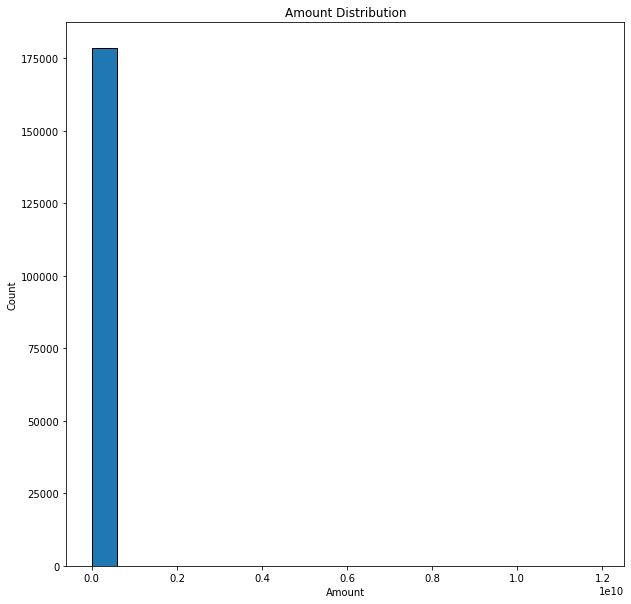

In [15]:
# Histogram Plot of Amount
plt.figure(figsize = (10,10))
plt.hist(df1['amount'], bins = 20, edgecolor = 'black');
plt.xlabel('Amount'); 
plt.ylabel('Count'); 
plt.title('Amount Distribution');

Using IQR for outliers

In [16]:
# Calculate first and third quartile
first_quartile = df1['amount'].describe()['25%']
third_quartile = df1['amount'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df2 = df1[(df1['amount'] > (first_quartile - 3 * iqr)) &
            (df1['amount'] < (third_quartile + 3 * iqr))]

In [17]:
df2.amount.describe()

count    139275.000000
mean       -273.355796
std        1336.057542
min       -4899.910000
25%        -590.000000
50%        -100.000000
75%          25.000000
max        4199.030000
Name: amount, dtype: float64

In [18]:
df2.Bank.unique()

array([1, 3, 0, 4, 2])

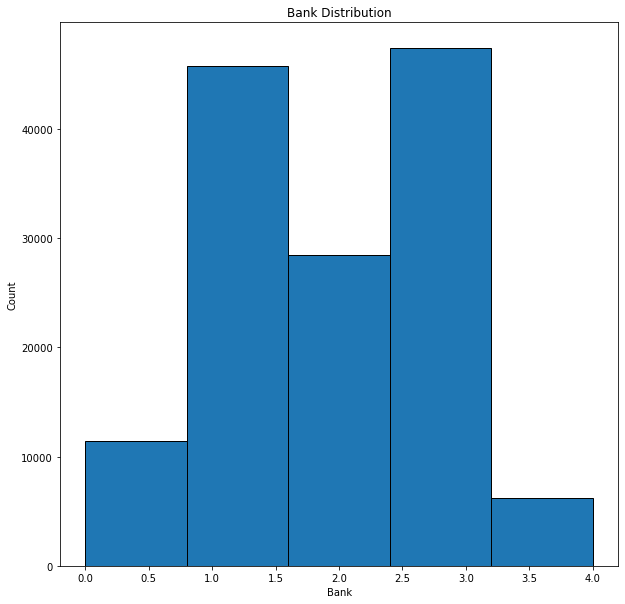

In [19]:
# Histogram Plot of Bank Distribution
plt.figure(figsize = (10,10))
plt.hist(df2['Bank'], bins = 5, edgecolor = 'black');
plt.xlabel('Bank'); 
plt.ylabel('Count'); 
plt.title('Bank Distribution');

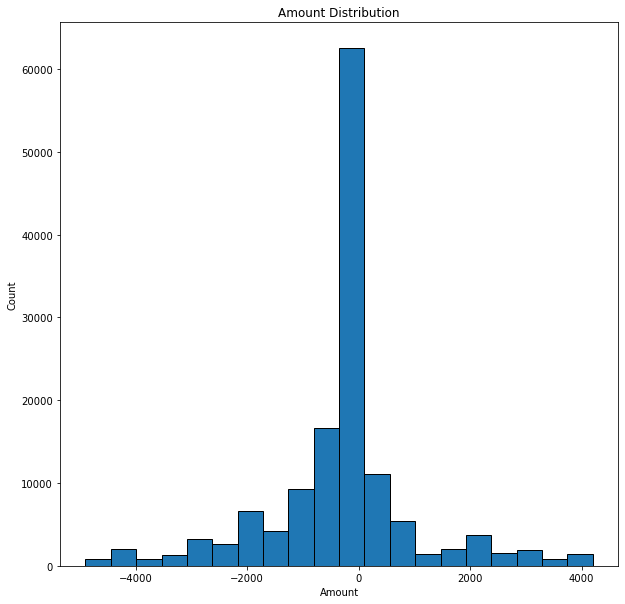

In [20]:
# Histogram Plot of Site EUI
plt.figure(figsize = (10,10))
plt.hist(df2['amount'], bins = 20, edgecolor = 'black');
plt.xlabel('Amount'); 
plt.ylabel('Count'); 
plt.title('Amount Distribution');

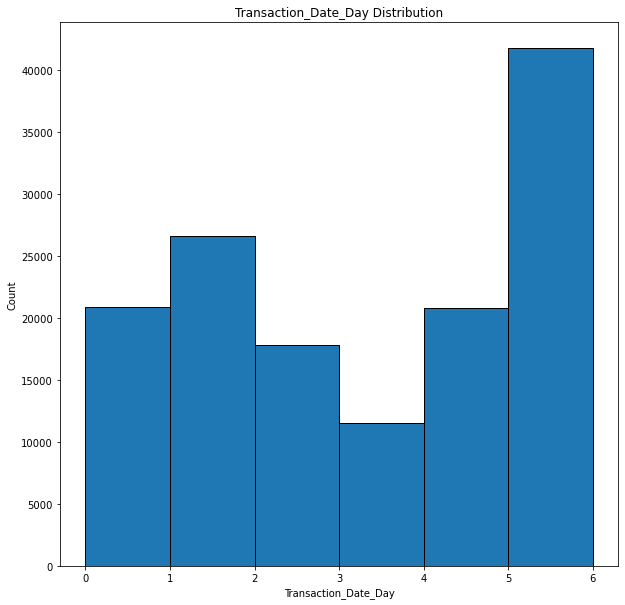

In [22]:
# Histogram Plot of Transaction_Date_Day
plt.figure(figsize = (10,10))
plt.hist(df2['Transaction_Date_Day'], bins = 6, edgecolor = 'black');
plt.xlabel('Transaction_Date_Day'); 
plt.ylabel('Count'); 
plt.title('Transaction_Date_Day Distribution');

In [23]:
df3= df2[df2.amount<0]
df3 = df3[['App_ID', 'amount']]
df3



,App_ID,amount
0,7663,-240.00
1,7663,-1800.00
2,7663,-2000.00
5,7663,-110.00
6,7663,-100.00
...,...,...
199995,52340,-100.00
199996,52340,-500.00
199997,52340,-20.00
199998,52340,-13.39


In [24]:
#Total Spend based on AppId
grouped_df3 = df3.groupby(["App_ID"])
grouped_and_summed_df3 = grouped_df3.sum()
amount_spent_total = grouped_and_summed_df3.amount.rename('Amount_Spent_Total').reset_index().abs()
amount_spent_total

,App_ID,Amount_Spent_Total
0,96.0,1350.00
1,118.0,3336.63
2,139.0,22417.45
3,154.0,14720.69
4,160.0,15606.30
...,...,...
3283,121376.0,1999.06
3284,121426.0,2000.00
3285,121547.0,10626.24
3286,121592.0,25078.00


In [326]:
#Total Inflow based on App Id
df5= df2[df2.amount>=0]
df5 = df5[['App_ID', 'amount']]

grouped_df5 = df5.groupby(["App_ID"])
grouped_and_summed_df5 = grouped_df5.sum()
amount_inflow_total = grouped_and_summed_df5.amount.rename('Amount_Inflow_Total').reset_index()
amount_inflow_total


,App_ID,Amount_Inflow_Total
0,14,0.33
1,96,950.00
2,118,1736.78
3,139,5885.17
4,154,5935.80
...,...,...
4375,121426,2000.00
4376,121547,4000.00
4377,121592,20690.15
4378,121699,0.00


In [327]:
#Max amount spent for each Appid
amount_spent_max = df1.groupby('App_ID').amount.min().rename('Amount_Spent_Max').reset_index().abs()
amount_spent_max

,App_ID,Amount_Spent_Max
0,14.0,0.33
1,96.0,500.00
2,118.0,11000.00
3,139.0,150000.00
4,154.0,41865.00
...,...,...
4585,121426.0,1000.00
4586,121547.0,3700.00
4587,121592.0,10000.00
4588,121699.0,0.00


In [328]:
#Min amount spent for each Appid
amount_spent_min = df3.groupby('App_ID').amount.max().rename('Amount_Spent_Min').reset_index().abs()
amount_spent_min

,App_ID,Amount_Spent_Min
0,96.0,400.00
1,118.0,49.63
2,139.0,5.90
3,154.0,0.48
4,160.0,0.46
...,...,...
3283,121376.0,10.00
3284,121426.0,1000.00
3285,121547.0,3.00
3286,121592.0,1.00


In [329]:
#Max amount inflow for each Appid
amount_inflow_max = df1.groupby('App_ID').amount.max().rename('Amount_Inflow_Max').reset_index()
amount_inflow_max

,App_ID,Amount_Inflow_Max
0,14,0.33
1,96,500.00
2,118,12000.00
3,139,150000.00
4,154,50000.00
...,...,...
4585,121426,2000.00
4586,121547,5500.00
4587,121592,12000.00
4588,121699,0.00


In [330]:
#Min amount inflow for each Appid
amount_inflow_min = df5.groupby('App_ID').amount.min().rename('Amount_Inflow_Min').reset_index().abs()
amount_inflow_min

,App_ID,Amount_Inflow_Min
0,14.0,0.33
1,96.0,450.00
2,118.0,1.00
3,139.0,1.00
4,154.0,43.80
...,...,...
4375,121426.0,0.00
4376,121547.0,1000.00
4377,121592.0,2.15
4378,121699.0,0.00


In [331]:
amount_inflow= pd.merge(amount_inflow_min,amount_inflow_max,on='App_ID',how='inner')
amount_spent = pd.merge(amount_spent_min,amount_spent_max,on='App_ID',how='inner')
amount_total = pd.merge(amount_inflow_total,amount_spent_total,on='App_ID',how='inner')

merged_df = pd.merge(amount_inflow, amount_spent, on="App_ID")
still_merging_df= pd.merge(merged_df, transaction_count, on="App_ID")
df7 = pd.merge(still_merging_df, amount_total, on="App_ID")


df7

,App_ID,Amount_Inflow_Min,Amount_Inflow_Max,Amount_Spent_Min,Amount_Spent_Max,Transaction Count,Amount_Inflow_Total,Amount_Spent_Total
0,96.0,450.00,500.00,400.00,500.0,5,950.00,1350.00
1,118.0,1.00,12000.00,49.63,11000.0,15,1736.78,3336.63
2,139.0,1.00,150000.00,5.90,150000.0,74,5885.17,22417.45
3,154.0,43.80,50000.00,0.48,41865.0,29,5935.80,14720.69
4,160.0,300.00,13315.00,0.46,6000.0,23,7909.55,15606.30
...,...,...,...,...,...,...,...,...
3113,121376.0,2000.00,2000.00,10.00,699.0,7,2000.00,1999.06
3114,121426.0,0.00,2000.00,1000.00,1000.0,4,2000.00,2000.00
3115,121547.0,1000.00,5500.00,3.00,3700.0,18,4000.00,10626.24
3116,121592.0,2.15,12000.00,1.00,10000.0,65,20690.15,25078.00


In [332]:
df7= df7.drop(['App_ID'], axis=1)

In [333]:
df7

,Amount_Inflow_Min,Amount_Inflow_Max,Amount_Spent_Min,Amount_Spent_Max,Transaction Count,Amount_Inflow_Total,Amount_Spent_Total
0,450.00,500.00,400.00,500.0,5,950.00,1350.00
1,1.00,12000.00,49.63,11000.0,15,1736.78,3336.63
2,1.00,150000.00,5.90,150000.0,74,5885.17,22417.45
3,43.80,50000.00,0.48,41865.0,29,5935.80,14720.69
4,300.00,13315.00,0.46,6000.0,23,7909.55,15606.30
...,...,...,...,...,...,...,...
3113,2000.00,2000.00,10.00,699.0,7,2000.00,1999.06
3114,0.00,2000.00,1000.00,1000.0,4,2000.00,2000.00
3115,1000.00,5500.00,3.00,3700.0,18,4000.00,10626.24
3116,2.15,12000.00,1.00,10000.0,65,20690.15,25078.00


In [334]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df7)


# We will explore different values for k, and look at the scree plot ('elbow method') using WSS distance (inertia)

wss = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, random_state = 25)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

wss

[21825.999999999956,
 18138.614129993533,
 15183.952905477983,
 12392.422365516182,
 9704.124827103944,
 8083.961522074699,
 6494.024908818506,
 5537.383404400683,
 5078.2513125129135,
 4658.258579242037,
 4250.23362868577,
 3895.147588668223,
 3596.19740164515,
 3381.0999969566647]

In [335]:
from pandas import DataFrame
dataset = DataFrame(df_scaled)
dataset.describe()

,0,1,2,3,4,5,6
count,3.118000e+03,3.118000e+03,3.118000e+03,3.118000e+03,3.118000e+03,3.118000e+03,3.118000e+03
mean,3.585258e-16,-1.506688e-15,3.217083e-17,8.616869e-18,-3.749406e-17,4.278169e-17,-1.413594e-17
std,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00
min,-2.701476e-01,-8.191397e-02,-2.565990e-01,-4.428283e-01,-7.500000e-01,-4.844300e-01,-6.997609e-01
25%,-2.679213e-01,-8.190465e-02,-2.541510e-01,-3.481900e-01,-5.551064e-01,-4.004135e-01,-5.519638e-01
50%,-2.679213e-01,-8.188933e-02,-2.382262e-01,-2.535459e-01,-2.627661e-01,-2.221858e-01,-2.755570e-01
75%,-2.323004e-01,-8.185860e-02,-1.700759e-01,3.038620e-02,2.105468e-01,1.094758e-01,2.263436e-01
max,8.635079e+00,1.768156e+01,1.149410e+01,2.187423e+01,2.149571e+01,3.542964e+01,2.322877e+01


/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


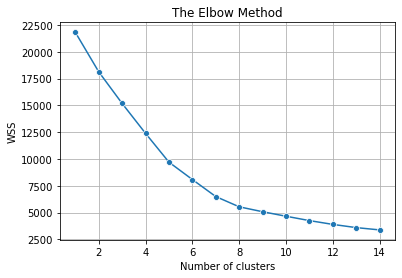

In [336]:
sns.lineplot(range(1,15), wss, marker='o')
plt.grid(axis='both')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [337]:
# Silhotte Score

from sklearn.metrics import silhouette_samples,silhouette_score

for i in range(2, 11):
    clusteres = KMeans(n_clusters = i, random_state = 23)
    y=clusteres.fit_predict(df_scaled)
   # The higher (up to 1) the better
    s =silhouette_score(df_scaled, y )
    print("silhouette =",s, "for i=", i)

silhouette = 0.5682853184546434 for i= 2
silhouette = 0.6334508852194163 for i= 3
silhouette = 0.6192525657396016 for i= 4
silhouette = 0.565691687268951 for i= 5
silhouette = 0.5774865271983274 for i= 6
silhouette = 0.562034064273824 for i= 7
silhouette = 0.4483329863929983 for i= 8
silhouette = 0.3768316071199411 for i= 9
silhouette = 0.37982549434240076 for i= 10


In [338]:
KM = KMeans(n_clusters=3, random_state = 23)
KM.fit(df_scaled)

KMeans(n_clusters=3, random_state=23)

Greater silhouette score indicates better separation of points in clusters to their neighboring or nearby clusters. It appears again that k=3 seems to be a good choice.

In [339]:
k_clusters = KM.labels_

silhouette_score(df_scaled, k_clusters)


0.6334508852194163

In [340]:
silhouette_samples(df_scaled, k_clusters).min()

-0.3060476693974858

As per the Silhoutte Score and Elbow Plot, The optimum number of clusters are 5

In [341]:
df7['k_clusters'] = k_clusters
df7.head()

,Amount_Inflow_Min,Amount_Inflow_Max,Amount_Spent_Min,Amount_Spent_Max,Transaction Count,Amount_Inflow_Total,Amount_Spent_Total,k_clusters
0,450.0,500.0,400.00,500.0,5,950.00,1350.00,1
1,1.0,12000.0,49.63,11000.0,15,1736.78,3336.63,1
2,1.0,150000.0,5.90,150000.0,74,5885.17,22417.45,1
3,43.8,50000.0,0.48,41865.0,29,5935.80,14720.69,1
4,300.0,13315.0,0.46,6000.0,23,7909.55,15606.30,1


In [342]:
dfN = df7.drop(['k_clusters'],axis=1)

In [343]:
KM.cluster_centers_.shape

(3, 7)

In [344]:
cluster_centers=pd.DataFrame(data=KM.cluster_centers_,columns=[dfN.columns])
cluster_centers

,Amount_Inflow_Min,Amount_Inflow_Max,Amount_Spent_Min,Amount_Spent_Max,Transaction Count,Amount_Inflow_Total,Amount_Spent_Total
0,3.695897,-0.081870,2.792636,-0.008614,-0.580945,-0.297183,-0.458274
1,-0.155750,-0.003514,-0.113384,-0.104499,-0.175119,-0.138267,-0.176787
2,-0.244419,0.079366,-0.230361,1.114061,2.157912,1.620851,2.112625


In [345]:
#cluster_centers is centroids for all the features, but we want original values thus we perform inverse transform
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[dfN.columns])
cluster_centers

,Amount_Inflow_Min,Amount_Inflow_Max,Amount_Spent_Min,Amount_Spent_Max,Transaction Count,Amount_Inflow_Total,Amount_Spent_Total
0,1781.445682,2.955202e+04,1233.122576,22939.617652,14.143939,4811.190530,8512.403258
1,51.384291,5.261090e+07,57.926233,17874.102862,43.296079,8894.433023,18434.443232
2,11.556770,1.082282e+08,10.620700,82250.018482,210.887160,54093.826031,99133.271518


We can see that that in Cluster 0, the the minimum inflow amount is the highest among all whereas the transaction count is low

Whereas in Cluster 1 the total inflow amount is directly proportional to total amount spent

And in Cluster 2 the transaction count is the highest 

<AxesSubplot:xlabel='Amount_Spent_Total', ylabel='Amount_Inflow_Total'>

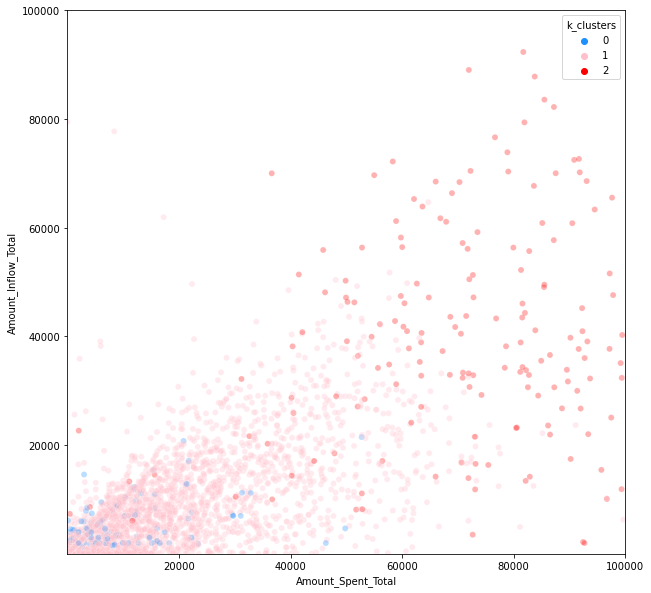

In [346]:
plt.figure(figsize=(10, 10))
plt.ylim(5, 100000)
plt.xlim(5, 100000)
sns.scatterplot(x='Amount_Spent_Total', y='Amount_Inflow_Total', hue='k_clusters', data=df7,palette=['dodgerblue','pink','red'], alpha=0.3, legend='full')

<AxesSubplot:xlabel='Amount_Spent_Total', ylabel='Transaction Count'>

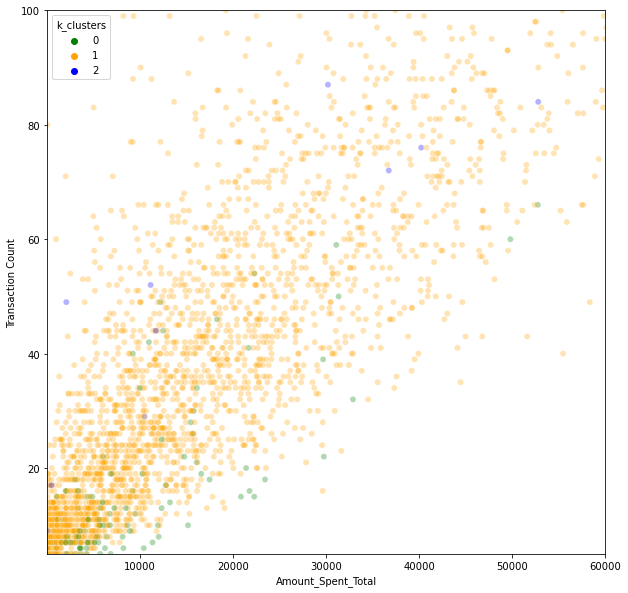

In [347]:
plt.figure(figsize=(10, 10))
plt.ylim(5, 100)
plt.xlim(5, 60000)
sns.scatterplot(x='Amount_Spent_Total', y='Transaction Count', hue='k_clusters', data=df7, alpha=0.3,palette=['green','orange','blue'], legend='full')

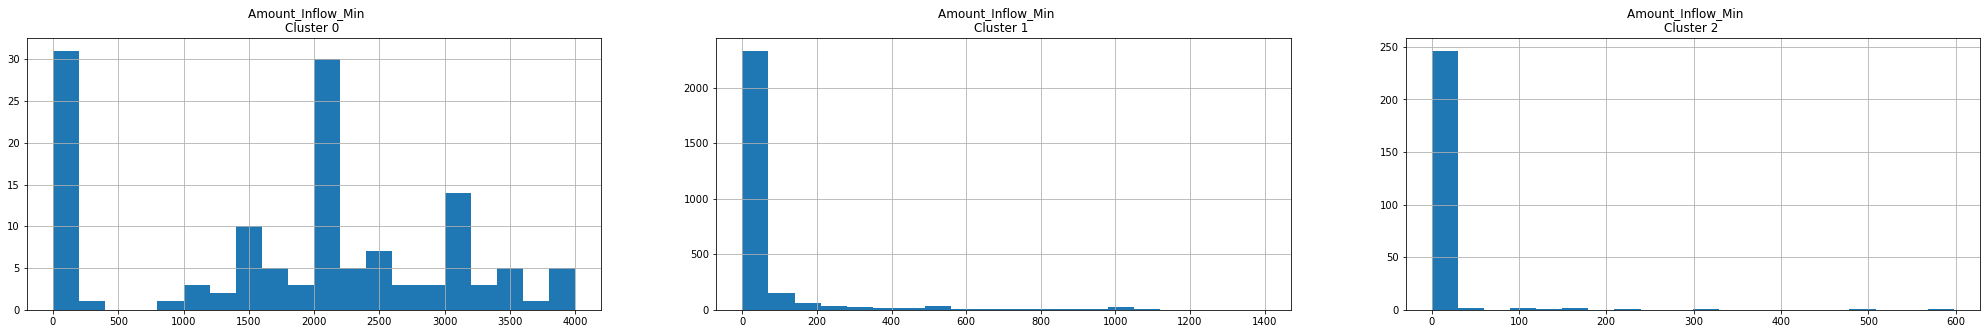

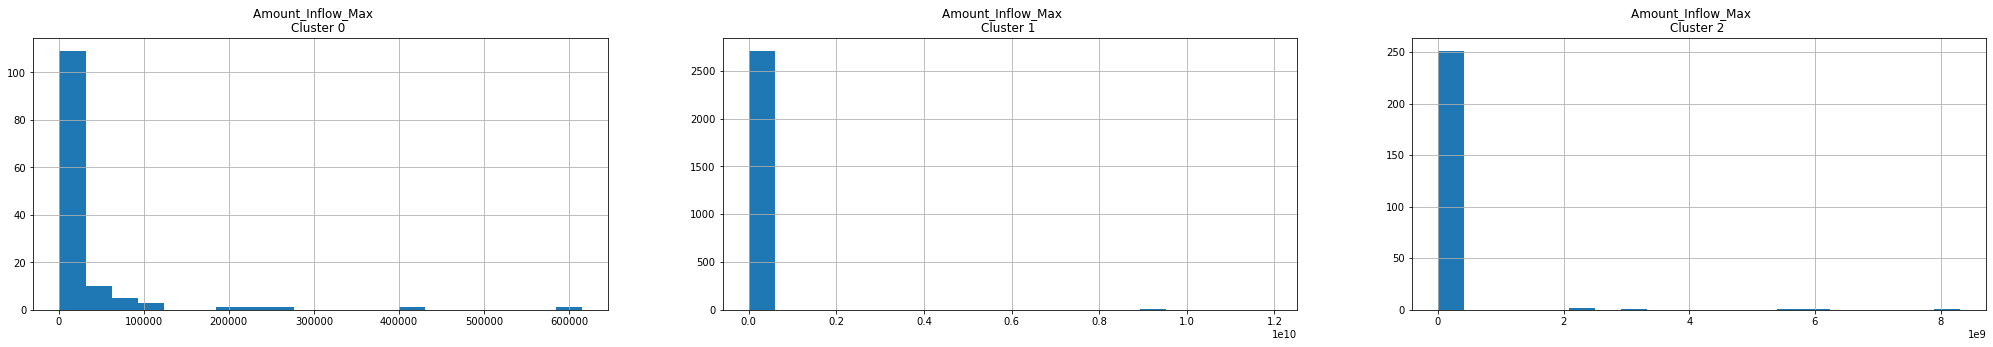

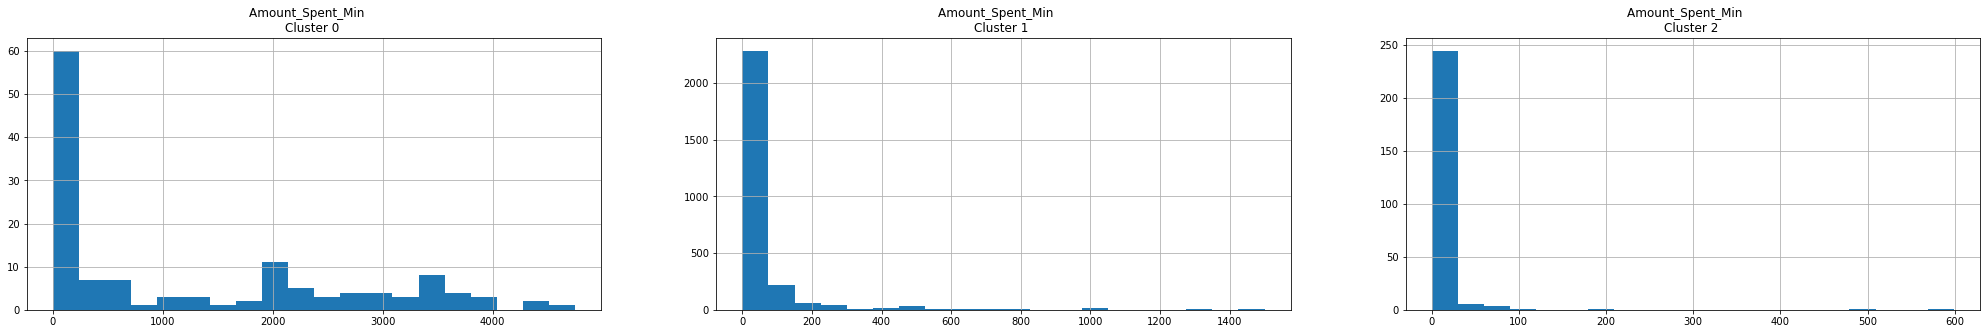

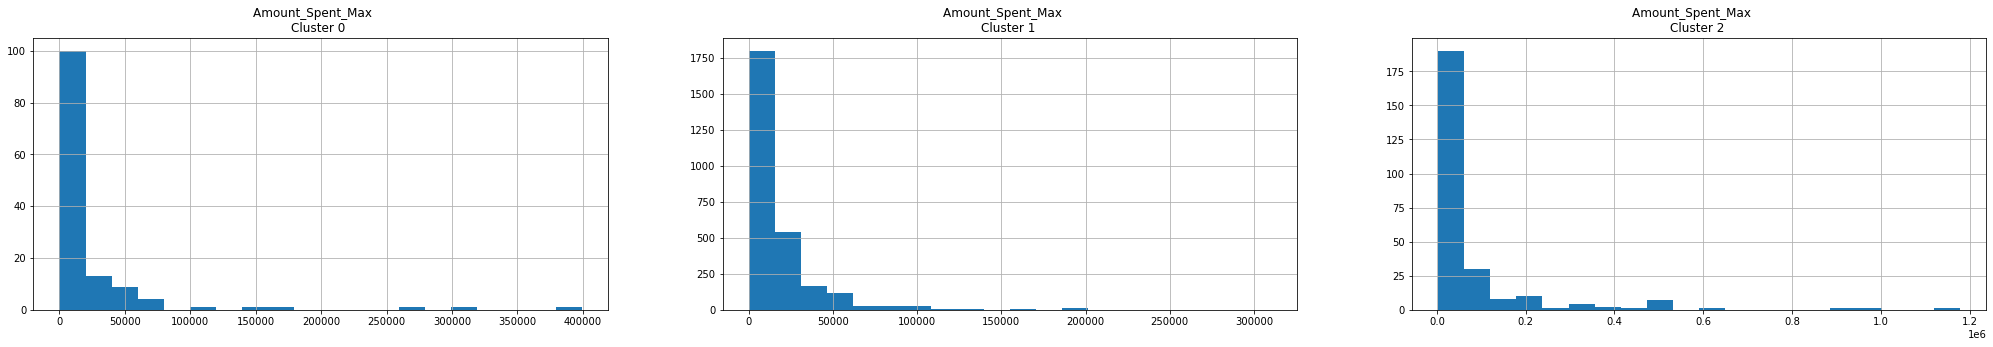

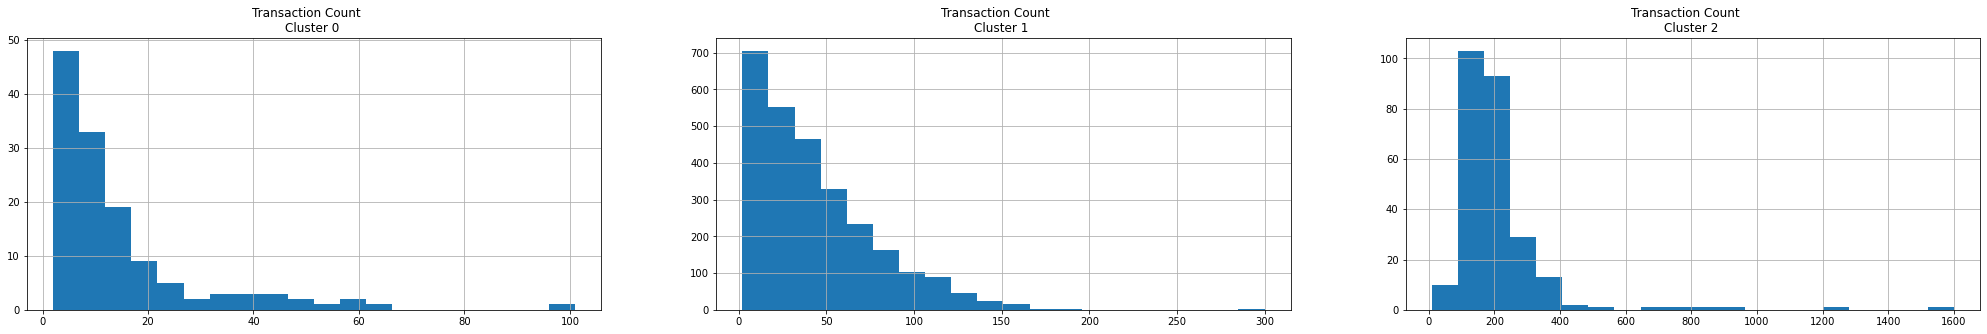

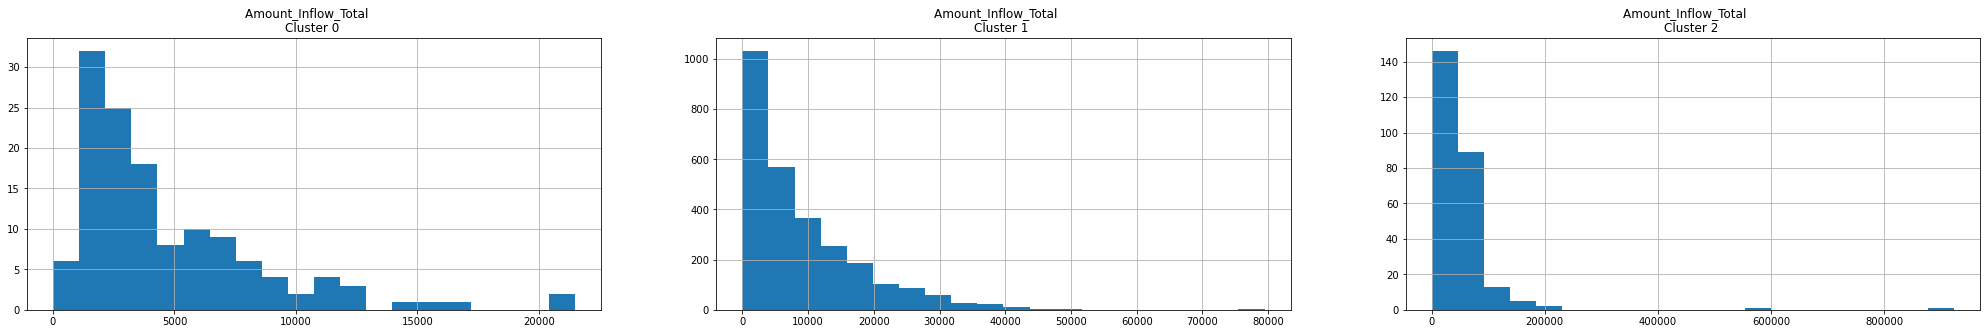

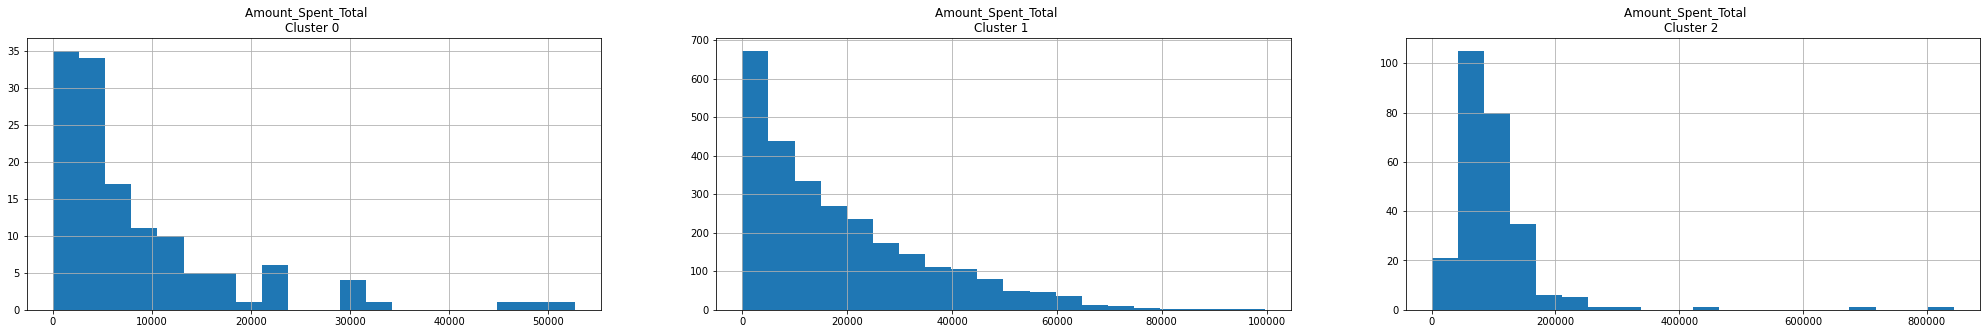

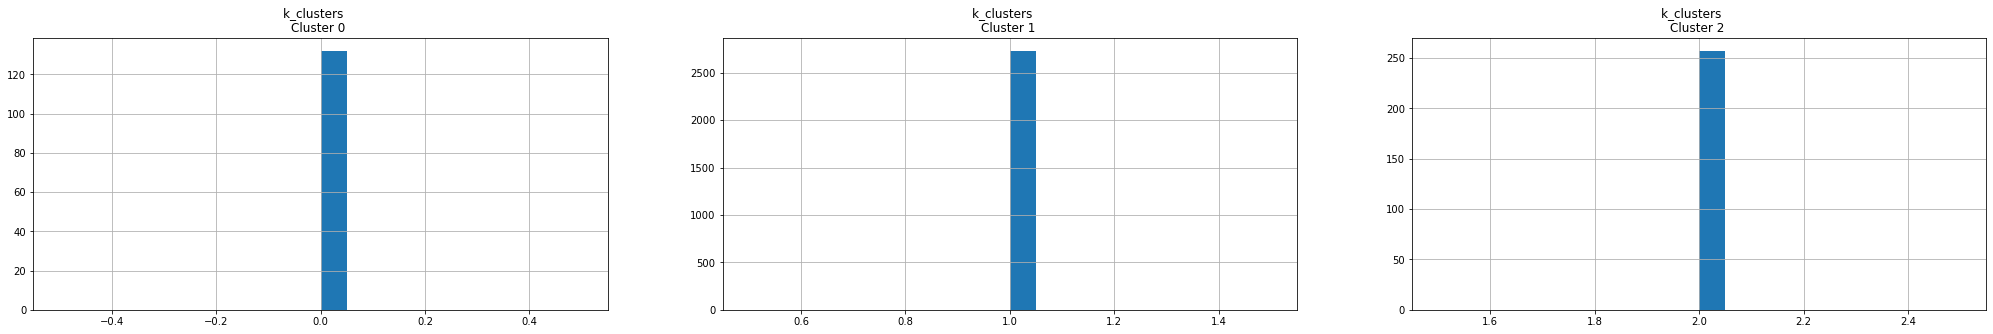

In [292]:
for i in df7.columns:
    plt.figure(figsize = (35, 5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = df7[df7['k_clusters'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
    plt.show()

In [284]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-1.27119306,  0.81766834],
       [-0.88220308, -0.43482475],
       [ 0.37718242, -0.16990959],
       ...,
       [-0.96463106,  1.05017329],
       [ 0.28185615, -0.31758379],
       [-1.04079665, -0.46183908]])

We can see in the above that 4 clusters appears to be optimal for this data, a range of behavior for 5 to 8 clusters appear poor performance

In [285]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.271193,0.817668
1,-0.882203,-0.434825
2,0.377182,-0.169910
3,-0.410085,-0.340064
4,-0.568099,0.006948
...,...,...
3113,-1.510402,2.558350
3114,-1.316996,1.147066
3115,-0.964631,1.050173
3116,0.281856,-0.317584


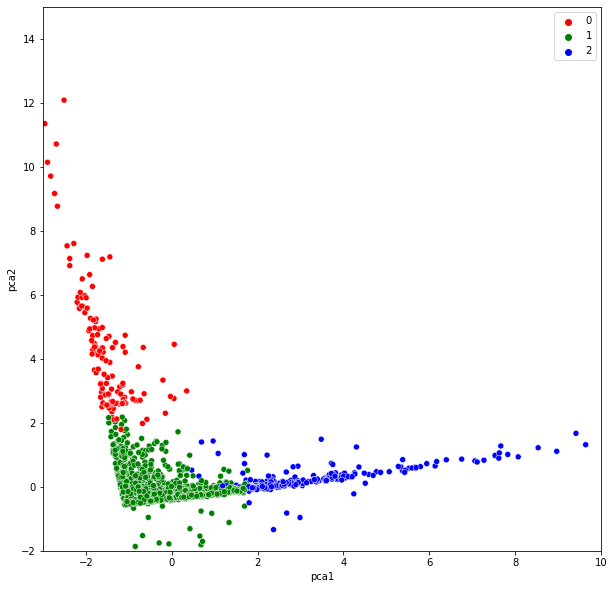

In [307]:
plt.figure(figsize=(10,10))
plt.ylim(-2, 15)
plt.xlim(-3, 10)
ax = sns.scatterplot(x="pca1", y="pca2",hue=k_clusters, data = pca_df, palette =['red','green','blue'])
plt.show()